# Lab 5 骷髏頭校正

1. 引入函式庫

In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from skimage import transform
from skimage.transform import rotate 

2. 讀入圖片，並標示出重點關注區域

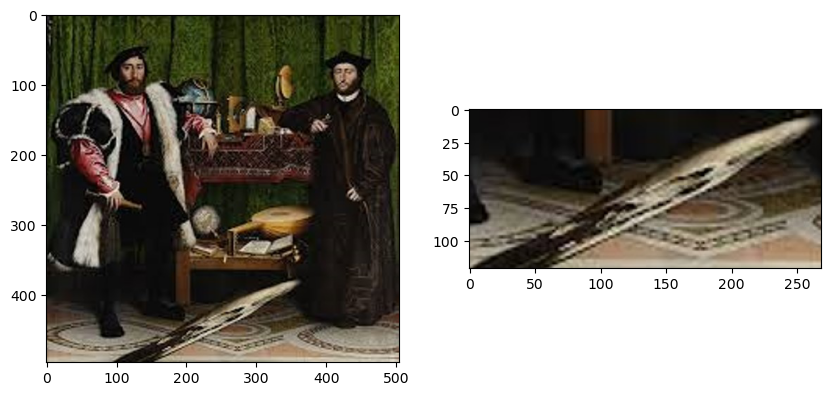

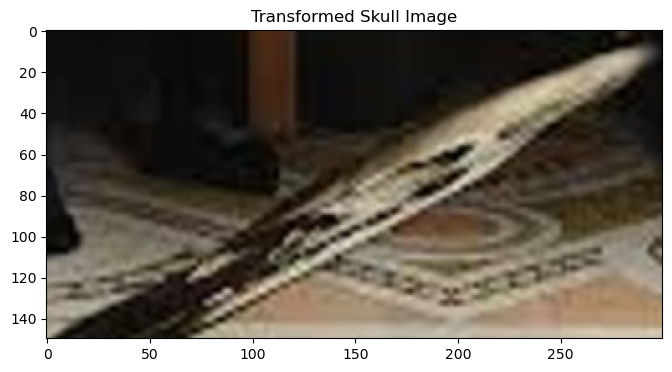

In [ ]:
a = io.imread("./source/ambassadors.jpg")
skull = a[374:495, 97:366]                                          # 選取圖片目標區域

fig = plt.figure(figsize=(10, 5))                                   # 查看處理前後圖片
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(a)
ax2.imshow(skull)
plt.show()

skull_cv = cv2.cvtColor(skull, cv2.COLOR_RGB2BGR)

src_pts = np.float32([[0, 0], [skull.shape[1] - 1, 0], [0, skull.shape[0] - 1], [skull.shape[1] - 1, skull.shape[0] - 1]])  # 左上、右上、左下、右下
dst_pts = np.float32([[0, 0], [300, 0], [0, 150], [300, 150]])                                                              # 期望得到新img大小 

matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)              # 轉換圖片關注區域大小

# Apply the perspective transformation
warped_skull = cv2.warpPerspective(skull_cv, matrix, (300, 150))

warped_skull_rgb = cv2.cvtColor(warped_skull, cv2.COLOR_BGR2RGB)    # 轉換圖片顏色至 matplotlib 對應色盤

plt.figure(figsize=(8, 4))                                          # 顯示圖片
plt.imshow(warped_skull_rgb)
plt.title("Transformed Skull Image")
plt.show()

3. 將圖片校正，並返轉至要求成果

In [ ]:
def unwarp(img, src, dst, testing, angle):
    h, w = img.shape[:2]                                                                        # 拿出圖片長寬
    M = cv2.getPerspectiveTransform(src, dst)                                                   # 轉換成透明矩陣
    warped = cv2.warpPerspective(img, M, (w, h), flags = cv2.INTER_LINEAR)                      # 將透明矩陣依照設定長寬拉伸圖片
    if testing:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
        f.subplots_adjust(hspace=.2, wspace=.05)
        ax1.imshow(img, cmap='gray')
        x = [src[0][0], src[2][0], src[3][0], src[1][0], src[0][0]]
        y = [src[0][1], src[2][1], src[3][1], src[1][1], src[0][1]]
        ax1.plot(x, y, color='red', alpha=0.4, linewidth=3, solid_capstyle='round', zorder=2)
        image_rotated = rotate(warped, angle)                                                   # 將拉伸過的圖片進行順時針旋轉
        ax1.set_ylim([h, 0])
        ax1.set_xlim([0, w])
        ax1.set_title('Original Image', fontsize=20)

        ax2.imshow(image_rotated, cmap='gray')
        ax2.set_title('Distortion Correction Result', fontsize=20)
        plt.show()
    else:
        return warped, M

4. 規劃好將關注區域放大並校正的點位，送入校正函示

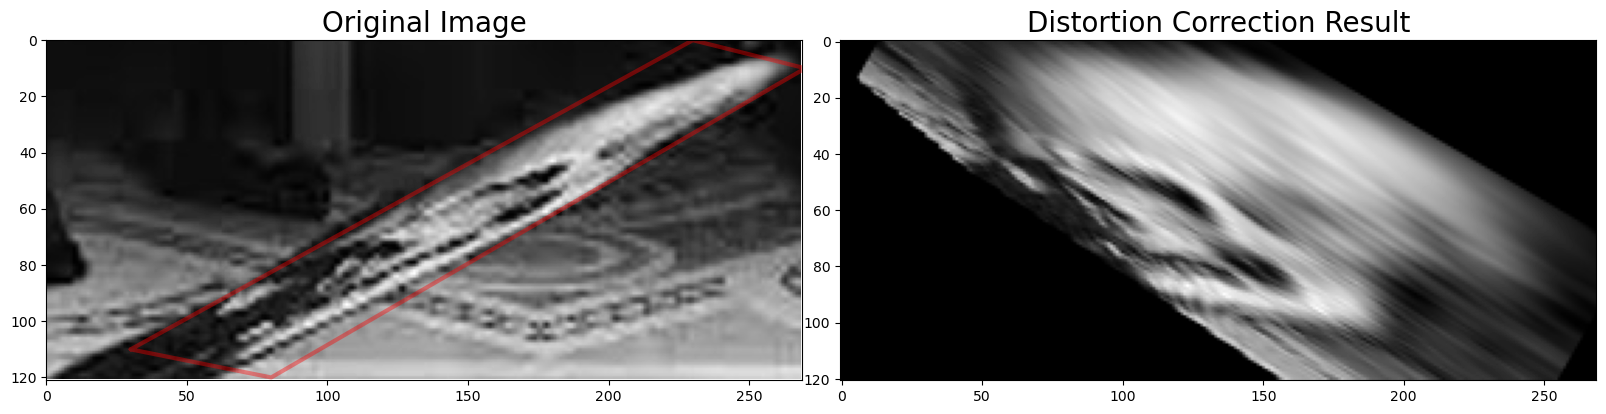

In [ ]:
pointLoc = np.float32([(30, 110), (80, 120), (230, 0), (270, 10)])       # 左下、右下、左上、右上

pointLocNEW =np.float32([(60, 90) ,(170, 100), (0, 10), (270, 0)])       # 原圖相對位置對應新圖片期望區域

unwarp(skull, pointLoc, pointLocNEW, True, -30)                          # 給定原圖、期望區域、順時針旋轉30度

5. 使用 Hack.md 繪製流程圖


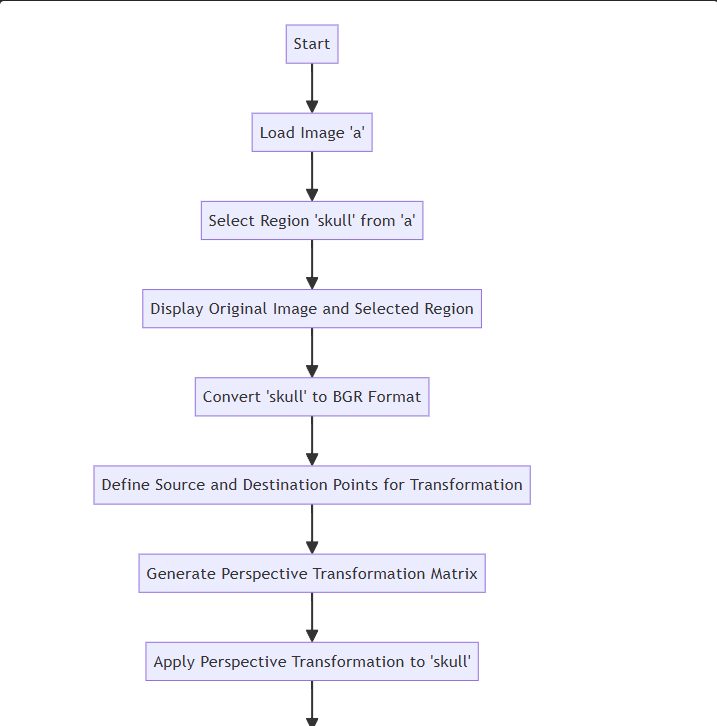<br>
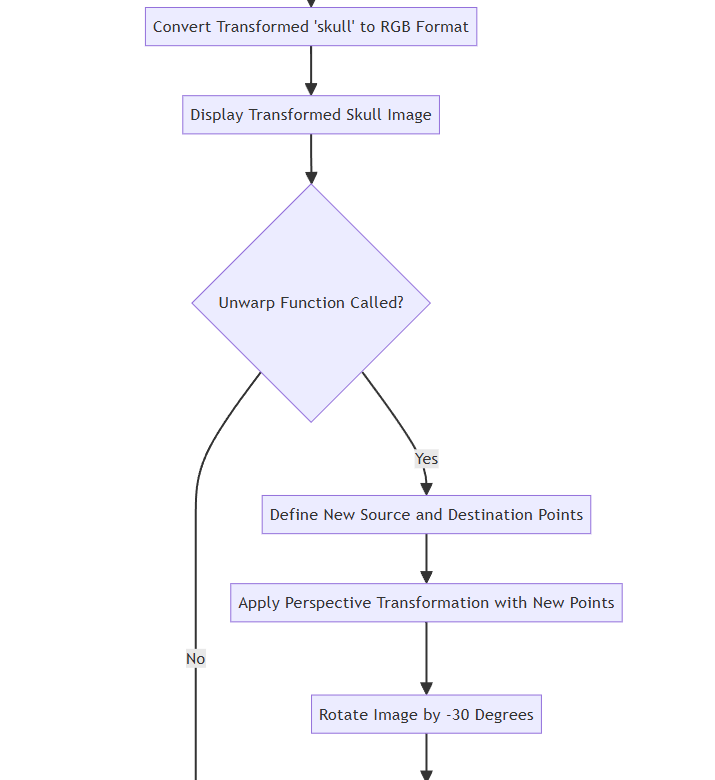<br>
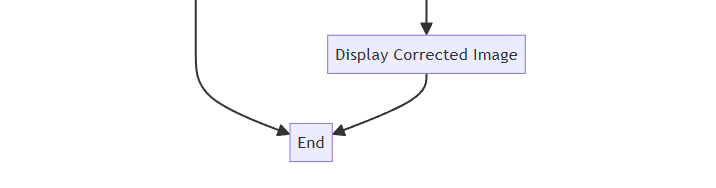

6. 成果<br>
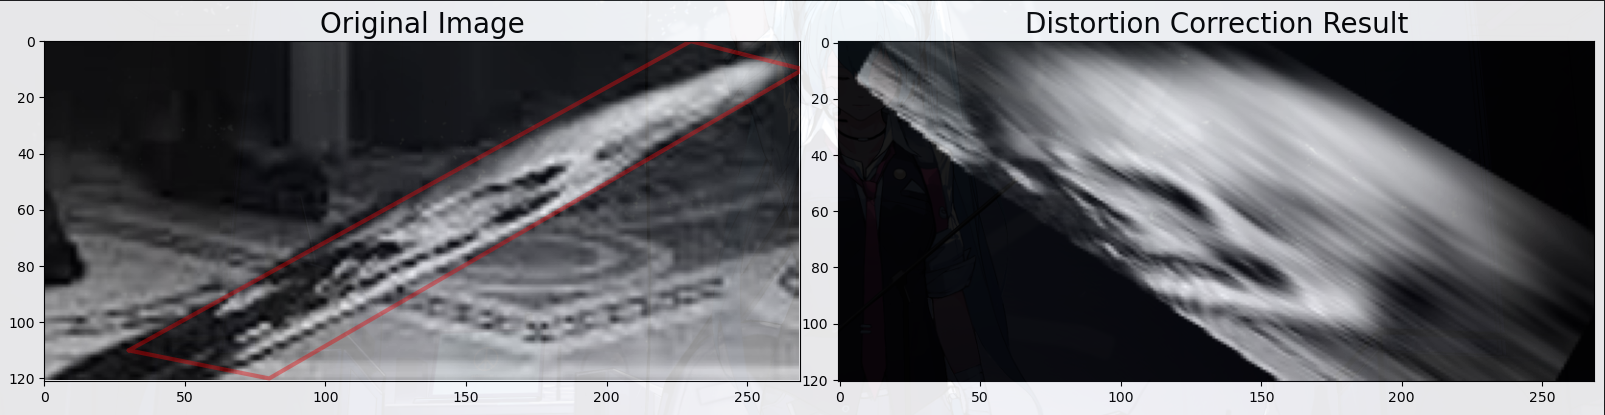

7. 心得<br>&emsp;&emsp;經過此次實驗，我更了解對於圖片的處理，這次的實驗個人認為相當有趣，是將圖片想關注的區域標出並以改變角度、放大等方式調整至容易觀察的狀態。以結果而言，至於結果照片的模糊個人猜測是跟關注區域圈選的大小有關，如範例給的，很明顯比我選的區域要大。